# LIBRARIES


In [4]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import json
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/rfqma/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# INISIASI DATASET


In [5]:
# import
PREPROCESSED_DATASET_FILE_NAME = "preprocessed.csv"
PREPROCESSED_DATASET_FILE_PATH = f"outputs/{PREPROCESSED_DATASET_FILE_NAME}"
DATA_FRAME_PREPROCESSED_DATASET = pd.read_csv(PREPROCESSED_DATASET_FILE_PATH)
DATA_FRAME_PREPROCESSED_DATASET_LENGTH = len(DATA_FRAME_PREPROCESSED_DATASET)
print(f"preprocessed dataset: {DATA_FRAME_PREPROCESSED_DATASET_LENGTH} tweets")
display(DATA_FRAME_PREPROCESSED_DATASET.tail(1))

preprocessed dataset: 4913 tweets


,user_id,username,user_display_name,tweet_id,full_text,created_at,cleaned_text,after_slang_text,underscore_negation_text,swap_negation_text,final_negation_text,is_different,after_stopwords_text,after_stemming_text,preprocessed_text
4912,1497098972443602944,RismaII4,Risma II 🇮🇩🇮🇩🇮🇩,1839477624550412418,Sebuah langkah besar menuju masa depan yang le...,Fri Sep 27 01:30:16 +0000 2024,sebuah langkah besar menuju masa depan yang le...,sebuah langkah besar menuju masa depan yang le...,sebuah langkah besar menuju masa depan yang le...,sebuah langkah besar menuju masa depan yang le...,sebuah langkah besar menuju masa depan yang le...,False,langkah berkesinambungan inklusif dukungan pem...,langkah sambung inklusif dukung bangun kota ne...,langkah sambung inklusif dukung bangun kota ne...


# INISIASI LEKSIKON


In [6]:
# InSet
with open("./lexicons/lexicon_json_inset-neg.txt") as f:
  inset_neg = f.read()
with open("./lexicons/lexicon_json_inset-pos.txt") as f:
  inset_pos = f.read()

insetNeg = json.loads(inset_neg)
insetPos = json.loads(inset_pos)

# sentistrength_id
with open("./lexicons/_json_sentiwords_id.txt") as f:
  sentistrength_id = f.read()

sentistrengthId = json.loads(sentistrength_id)

# SENTIMENT LABELLING


In [7]:
# inisiasi vader sentiment analyzer
sia_inset_neg = SentimentIntensityAnalyzer()
sia_inset_pos = SentimentIntensityAnalyzer()

# clear default lexicon
sia_inset_neg.lexicon.clear()
sia_inset_pos.lexicon.clear()

# assign InSet lexicon
sia_inset_neg.lexicon.update(insetNeg)
sia_inset_pos.lexicon.update(insetPos)

sia_sentistrength = SentimentIntensityAnalyzer()
sia_sentistrength.lexicon.clear()
sia_sentistrength.lexicon.update(sentistrengthId)

In [8]:
# polarity score
def get_inset_compound_score(text):
  inset_compound_score = sia_inset_neg.polarity_scores(text)["compound"] + sia_inset_pos.polarity_scores(text)["compound"]
  return inset_compound_score

def get_sentistrength_compound_score(text):
  sentistrength_compound_score = sia_sentistrength.polarity_scores(text)["compound"]
  return sentistrength_compound_score

DATA_FRAME_PREPROCESSED_DATASET["compound_score"] = DATA_FRAME_PREPROCESSED_DATASET["preprocessed_text"].apply(get_inset_compound_score)
DATA_FRAME_PREPROCESSED_DATASET["sentistrength_score"] = DATA_FRAME_PREPROCESSED_DATASET["preprocessed_text"].apply(get_sentistrength_compound_score)
display(DATA_FRAME_PREPROCESSED_DATASET.tail(1))

,user_id,username,user_display_name,tweet_id,full_text,created_at,cleaned_text,after_slang_text,underscore_negation_text,swap_negation_text,final_negation_text,is_different,after_stopwords_text,after_stemming_text,preprocessed_text,compound_score,sentistrength_score
4912,1497098972443602944,RismaII4,Risma II 🇮🇩🇮🇩🇮🇩,1839477624550412418,Sebuah langkah besar menuju masa depan yang le...,Fri Sep 27 01:30:16 +0000 2024,sebuah langkah besar menuju masa depan yang le...,sebuah langkah besar menuju masa depan yang le...,sebuah langkah besar menuju masa depan yang le...,sebuah langkah besar menuju masa depan yang le...,sebuah langkah besar menuju masa depan yang le...,False,langkah berkesinambungan inklusif dukungan pem...,langkah sambung inklusif dukung bangun kota ne...,langkah sambung inklusif dukung bangun kota ne...,-0.0192,0.875


In [9]:
# labelling
def get_inset_label(number):
  if number < 0:
    return "negatif"
  elif number > 0:
    return "positif"
  else:
    return "netral"
  
def get_sentistrength_label(number):
  if number < 0:
    return "negatif"
  elif number > 0:
    return "positif"
  else:
    return "netral"

DATA_FRAME_PREPROCESSED_DATASET["sentiment_label"] = DATA_FRAME_PREPROCESSED_DATASET["compound_score"].apply(get_inset_label)
DATA_FRAME_PREPROCESSED_DATASET["sentistrength_label"] = DATA_FRAME_PREPROCESSED_DATASET["sentistrength_score"].apply(get_sentistrength_label)
display(DATA_FRAME_PREPROCESSED_DATASET.tail(1))

,user_id,username,user_display_name,tweet_id,full_text,created_at,cleaned_text,after_slang_text,underscore_negation_text,swap_negation_text,final_negation_text,is_different,after_stopwords_text,after_stemming_text,preprocessed_text,compound_score,sentistrength_score,sentiment_label,sentistrength_label
4912,1497098972443602944,RismaII4,Risma II 🇮🇩🇮🇩🇮🇩,1839477624550412418,Sebuah langkah besar menuju masa depan yang le...,Fri Sep 27 01:30:16 +0000 2024,sebuah langkah besar menuju masa depan yang le...,sebuah langkah besar menuju masa depan yang le...,sebuah langkah besar menuju masa depan yang le...,sebuah langkah besar menuju masa depan yang le...,sebuah langkah besar menuju masa depan yang le...,False,langkah berkesinambungan inklusif dukungan pem...,langkah sambung inklusif dukung bangun kota ne...,langkah sambung inklusif dukung bangun kota ne...,-0.0192,0.875,negatif,positif


# EXPORT


In [10]:
DATA_FRAME_PREPROCESSED_DATASET.to_csv("outputs/sentiment.csv", index=False)

# PIE CHART InSet


sentiment_label
negatif    3039
positif    1341
netral      533
Name: count, dtype: int64


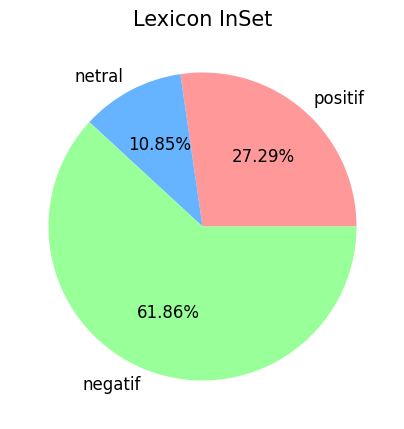

In [11]:
# InSet
inset_label	= DATA_FRAME_PREPROCESSED_DATASET["sentiment_label"]
inset_label_counts = inset_label.value_counts()
print(inset_label_counts)

positif_inset_perc = inset_label_counts.positif / inset_label_counts.sum() * 100
netral_inset_perc = inset_label_counts.netral / inset_label_counts.sum() * 100
negatif_inset_perc = inset_label_counts.negatif / inset_label_counts.sum() * 100

labels = 'positif', 'netral', 'negatif'
sizes = [positif_inset_perc, netral_inset_perc, negatif_inset_perc]
colors = ['#ff9999','#66b3ff','#99ff99']
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
ax.pie(sizes, labels = labels, autopct='%.2f%%', colors=colors, textprops={'fontsize': 12})
ax.set_title('Lexicon InSet', fontsize=15)
plt.show()

sentistrength_label
netral     2100
positif    1573
negatif    1240
Name: count, dtype: int64


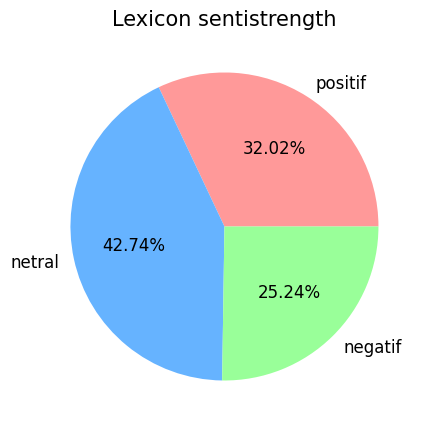

In [12]:
# sentistrength_id
inset_label	= DATA_FRAME_PREPROCESSED_DATASET["sentistrength_label"]
inset_label_counts = inset_label.value_counts()
print(inset_label_counts)

positif_inset_perc = inset_label_counts.positif / inset_label_counts.sum() * 100
netral_inset_perc = inset_label_counts.netral / inset_label_counts.sum() * 100
negatif_inset_perc = inset_label_counts.negatif / inset_label_counts.sum() * 100

labels = 'positif', 'netral', 'negatif'
sizes = [positif_inset_perc, netral_inset_perc, negatif_inset_perc]
colors = ['#ff9999','#66b3ff','#99ff99']
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
ax.pie(sizes, labels = labels, autopct='%.2f%%', colors=colors, textprops={'fontsize': 12})
ax.set_title('Lexicon sentistrength', fontsize=15)
plt.show()